In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import Levenshtein

c:\Users\Willi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# For each file, count the year/reduction length for each line
# Also count the failures
def count_reduction(name):

    data_df = pd.read_csv(f'../../../data/processed/aggregated_de-en_bleurt-20-d12.csv')
    df = pd.read_csv(f'{name}.csv')
    failed_df = pd.read_csv(f'{name}_failed.csv')

    out = {} # {year: [#deletion, ...], ...}
    ratio_out = {} # {year: [#deletion / sent_len, ...], ...}
    sent_lens = {
        'year': [],
        'sent_len': []
    }
    
    for line_idx in range(len(df)):

        # Filter out short refs
        if len(df['ref'][line_idx].split(' ')) < 10:
            continue

        data_idx = df['idx'][line_idx]
        year = data_df['year'][data_idx]
        mt_sys = data_df['mt_sys'][data_idx]
        
        if year not in out.keys():
            out[year] = []
            ratio_out[year] = []

        len_diff = len(df['mt'][line_idx].split(' ')) - len(df['adv'][line_idx].split(' '))

        out[year].append(len_diff)

        sent_lens['year'].append(year)
        sent_lens['sent_len'].append(len(df['mt'][line_idx].split(' ')))
        
        ratio_out[year].append(len_diff / len(df['mt'][line_idx].split(' ')))
    
    failed_out = {}

    for line_idx in range(len(failed_df)):

        data_idx = failed_df['0'][line_idx]
        year = data_df['year'][data_idx]
        mt_sys = data_df['mt_sys'][data_idx]
        
        if year not in failed_out.keys():
            failed_out[year] = 0

        len_diff = len(df['mt'][line_idx].split(' ')) - len(df['adv'][line_idx].split(' '))

        failed_out[year] += 1

    return out, failed_out, sent_lens, ratio_out

bleurt_out, bleurt_failed_out, sent_lens, bleurt_ratio_out = count_reduction('20-d12_input_reduction_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0')
bertscore_out, bertscore_failed_out, sent_lens, bertscore_ratio_out = count_reduction('bertscore_input_reduction_aggregated_de-en_bertscore_bertscore_down_1.0')

In [3]:
def dict_to_df(d):
    out = {
        'year': [],
        '# deletion': []
    }
    for year, lens in d.items():
        for l in lens:
            out['year'].append(year)
            out['# deletion'].append(l)
    df = pd.DataFrame(out)
    return df

Mean # deletions:
4.920037130354064
3.633918565558461
3.0109685815207285


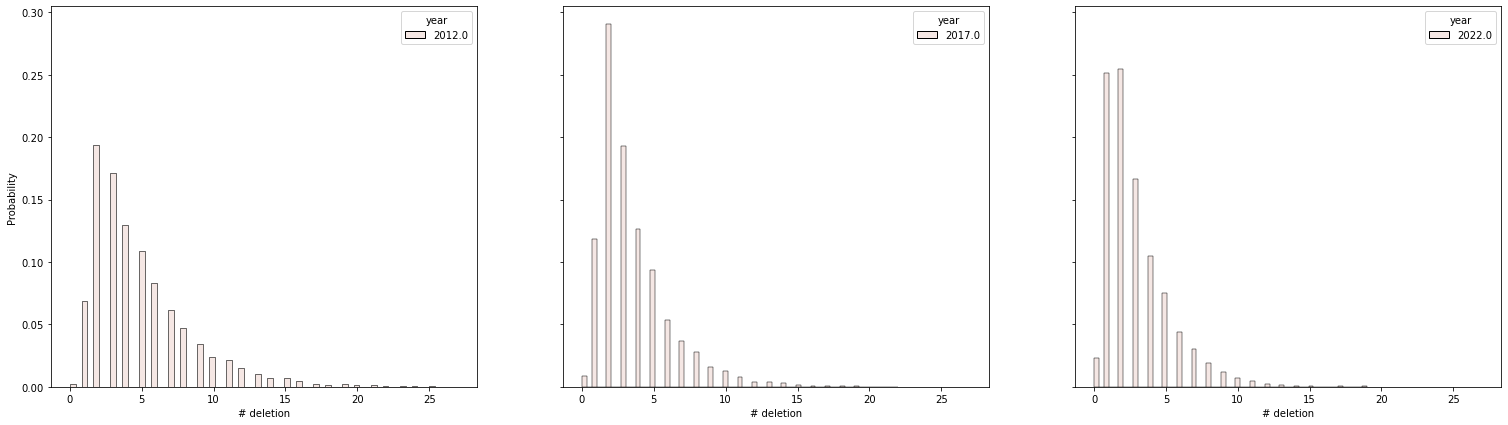

In [4]:
df = dict_to_df(bleurt_out)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='# deletion', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='# deletion', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='# deletion', stat='probability', hue='year', ax=ax3)

print('Mean # deletions:')
print(df[df['year'] == 2012]['# deletion'].mean())
print(df[df['year'] == 2017]['# deletion'].mean())
print(df[df['year'] == 2022]['# deletion'].mean())

Mean # deletions:
3.844965167827739
2.653236098450319
2.4333394127302572


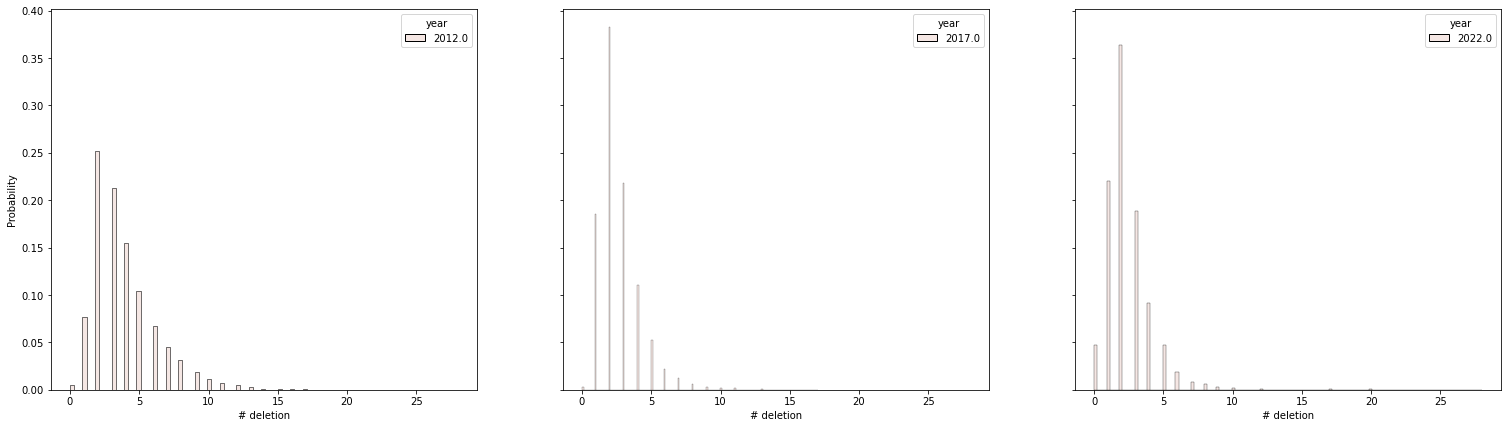

In [5]:
df = dict_to_df(bertscore_out)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='# deletion', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='# deletion', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='# deletion', stat='probability', hue='year', ax=ax3)

print('Mean # deletions:')
print(df[df['year'] == 2012]['# deletion'].mean())
print(df[df['year'] == 2017]['# deletion'].mean())
print(df[df['year'] == 2022]['# deletion'].mean())

Mean sentence length:
26.193540215326156
20.68222424794895
18.920299106328653


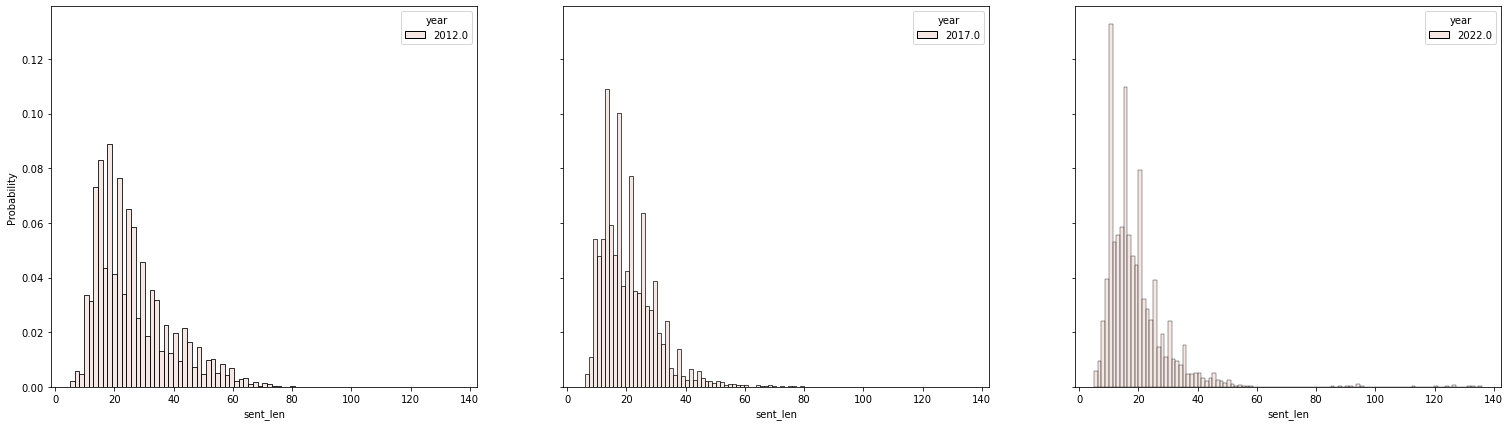

In [6]:
df = pd.DataFrame(sent_lens)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='sent_len', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='sent_len', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='sent_len', stat='probability', hue='year', ax=ax3)

print('Mean sentence length:')
print(df[df['year'] == 2012]['sent_len'].mean())
print(df[df['year'] == 2017]['sent_len'].mean())
print(df[df['year'] == 2022]['sent_len'].mean())

In [7]:
print(bleurt_failed_out)
print(bertscore_failed_out)

{2012: 459, 2017: 146, 2022: 112}
{2012: 105, 2017: 15, 2022: 8}


Mean # deletions:
0.19536582384708265
0.17906912038960465
0.1665581490713384


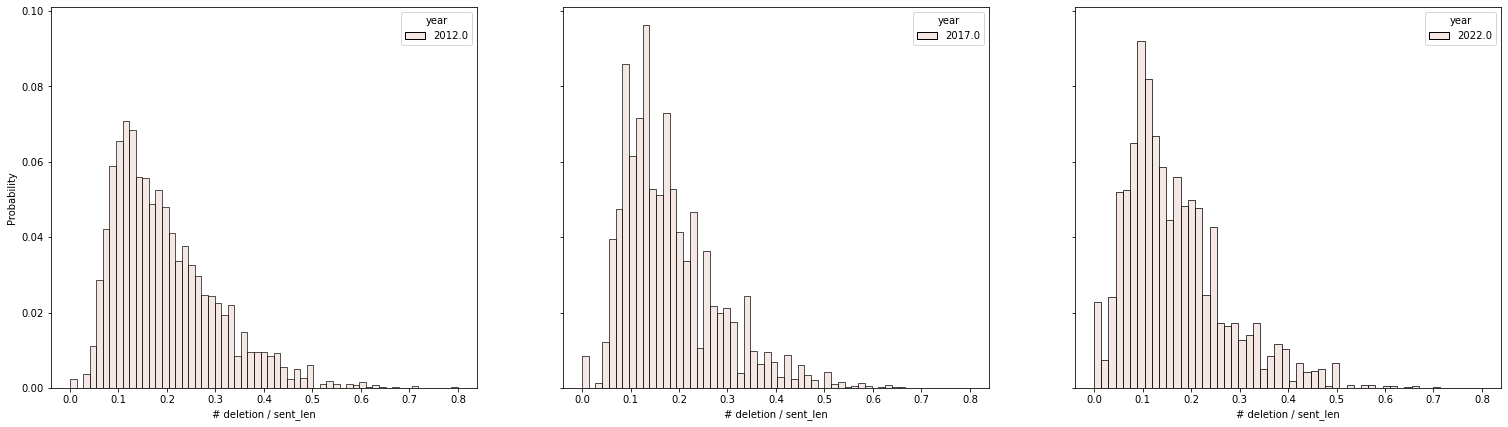

In [24]:
def ratio_to_df(d):
    out = {
        'year': [],
        '# deletion / sent_len': []
    }
    for year, lens in d.items():
        for l in lens:
            out['year'].append(year)
            out['# deletion / sent_len'].append(l)
    df = pd.DataFrame(out)
    return df

df = ratio_to_df(bleurt_ratio_out)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='# deletion / sent_len', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='# deletion / sent_len', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='# deletion / sent_len', stat='probability', hue='year', ax=ax3)

print('Mean # deletions:')
print(df[df['year'] == 2012]['# deletion / sent_len'].mean())
print(df[df['year'] == 2017]['# deletion / sent_len'].mean())
print(df[df['year'] == 2022]['# deletion / sent_len'].mean())

Mean # deletions:
0.15228860090695123
0.13317844871581958
0.13358848010918462


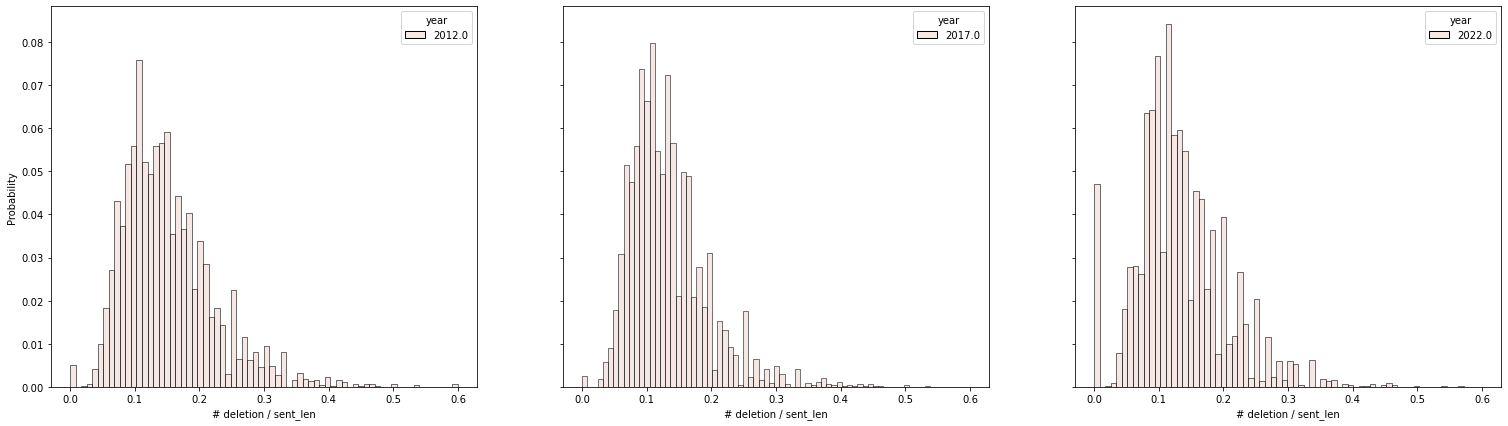

In [25]:
df = ratio_to_df(bertscore_ratio_out)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='# deletion / sent_len', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='# deletion / sent_len', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='# deletion / sent_len', stat='probability', hue='year', ax=ax3)

print('Mean # deletions:')
print(df[df['year'] == 2012]['# deletion / sent_len'].mean())
print(df[df['year'] == 2017]['# deletion / sent_len'].mean())
print(df[df['year'] == 2022]['# deletion / sent_len'].mean())